<a href="https://colab.research.google.com/github/Graviton12/MLA_SZM/blob/main/MLA2_SZM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Assignment #2
### Samia Mahmood
### CS 430
### Machine Learning in the Cloud

# Problem 1
## 1) Imports for specific models
#### Include imports for both LinearRegression and Logistic Regression
### Standard Imports

In [ ]:
# general importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Imports for specific models

In [ ]:
import sklearn.model_selection as model_selection

# importing for linear regression
from sklearn.linear_model import LinearRegression

# importing for logistic regression
from sklearn.linear_model import LogisticRegression

### Imports for Splitting Data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

### Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Confusion Matrix Code
This function is for creating a graphical version of the confusion matrix.

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

### ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## 2) Linear Regression - Acquire Data
#### Load the Steel_industry_data.csv into a data frame named df.

In [ ]:
# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/CS 430/Colab Notebooks/Steel_industry_data.csv')

In [ ]:
# Vewing the dataset
df.head(8)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load


#### Rename the columns according to Table 1: Columns Names.

In [ ]:
# renaming the columns in the dataset
df = df.rename(columns={'Usage_kWh': 'usage_kWh', 'Lagging_Current_Reactive.Power_kVarh': 'lagging_current_reactive.power_kvarh',
                        'Leading_Current_Reactive_Power_kVarh': 'leading_current_reactive_power_kvarh', 'Lagging_Current_Power_Factor': 'lagging_current_power_factor',
                        'Leading_Current_Power_Factor': 'leading_current_power_factor', 'NSM': 'nsm', 'WeekStatus':'week_status', 'Day_of_week': 'load_week',
                        'Load_Type':'load_type'})

In [ ]:
# checking if columns were renamed
df.head(8)

,date,usage_kWh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,CO2(tCO2),lagging_current_power_factor,leading_current_power_factor,nsm,week_status,load_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load


## 3) Statistics and Visual Exploration
#### summarize the numerical columns of the dataset

In [ ]:
# summarizing the numerical columns of the dataset
df.describe()

,usage_kWh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,CO2(tCO2),lagging_current_power_factor,leading_current_power_factor,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


#### Get the counts of the different load types. Save this into a data frame so we can plot

In [ ]:
# Get the counts of the different load types
load_type_counts = df['load_type'].value_counts()
load_type_counts_df = pd.DataFrame(load_type_counts).reset_index()
load_type_counts_df

,load_type,count
0,Light_Load,18072
1,Medium_Load,9696
2,Maximum_Load,7272


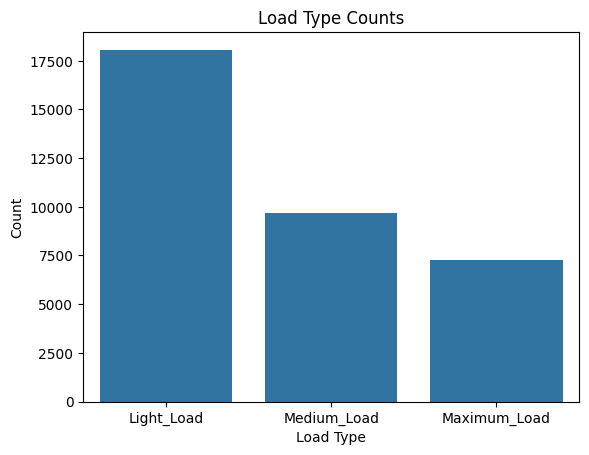

In [ ]:
# plotting the counts of the different load types
sns.barplot(x='load_type', y='count', data=load_type_counts_df, errorbar=None)
# creating axis labels and title
plt.xlabel('Load Type')
plt.ylabel('Count')
plt.title('Load Type Counts')

plt.show()

#### Create a barplot to view how many days fall under each load type. The size of the plot should 10 x 5

In [ ]:
# checking if date is a date time data type
df.info() # date is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   usage_kWh                             35040 non-null  float64
 2   lagging_current_reactive.power_kvarh  35040 non-null  float64
 3   leading_current_reactive_power_kvarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   lagging_current_power_factor          35040 non-null  float64
 6   leading_current_power_factor          35040 non-null  float64
 7   nsm                                   35040 non-null  int64  
 8   week_status                           35040 non-null  object 
 9   load_week                             35040 non-null  object 
 10  load_type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
# converting date into a date time and passing format
from datetime import datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# checking if the data type for date was covnerted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   usage_kWh                             35040 non-null  float64       
 2   lagging_current_reactive.power_kvarh  35040 non-null  float64       
 3   leading_current_reactive_power_kvarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   lagging_current_power_factor          35040 non-null  float64       
 6   leading_current_power_factor          35040 non-null  float64       
 7   nsm                                   35040 non-null  int64         
 8   week_status                           35040 non-null  object        
 9   load_week                             35040 non-null  object        
 10

In [ ]:
# extracting the day from the date and making this a new column
df['day_of_week'] = df['date'].dt.day

# checking if day was added
df.sample(8)

,date,usage_kWh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,CO2(tCO2),lagging_current_power_factor,leading_current_power_factor,nsm,week_status,load_week,load_type,day_of_week
33576,2018-12-16 18:15:00,5.22,0.00,10.30,0.00,100.00,45.21,65700,Weekend,Sunday,Maximum_Load,16
22263,2018-08-20 22:00:00,3.56,0.00,13.82,0.00,100.00,24.95,79200,Weekday,Monday,Medium_Load,20
28317,2018-10-22 23:30:00,4.32,7.16,0.00,0.00,51.66,100.00,84600,Weekday,Monday,Light_Load,22
7624,2018-03-21 10:15:00,71.57,31.00,0.00,0.03,91.76,100.00,36900,Weekday,Wednesday,Maximum_Load,21
26246,2018-10-01 09:45:00,46.30,20.23,0.00,0.02,91.63,100.00,35100,Weekday,Monday,Medium_Load,1
9509,2018-04-10 01:30:00,3.56,4.18,0.00,0.00,64.84,100.00,5400,Weekday,Tuesday,Light_Load,10
13454,2018-05-21 03:45:00,3.02,4.68,0.00,0.00,54.22,100.00,13500,Weekday,Monday,Light_Load,21
22105,2018-08-19 06:30:00,2.63,4.90,0.00,0.00,47.29,100.00,23400,Weekend,Sunday,Light_Load,19


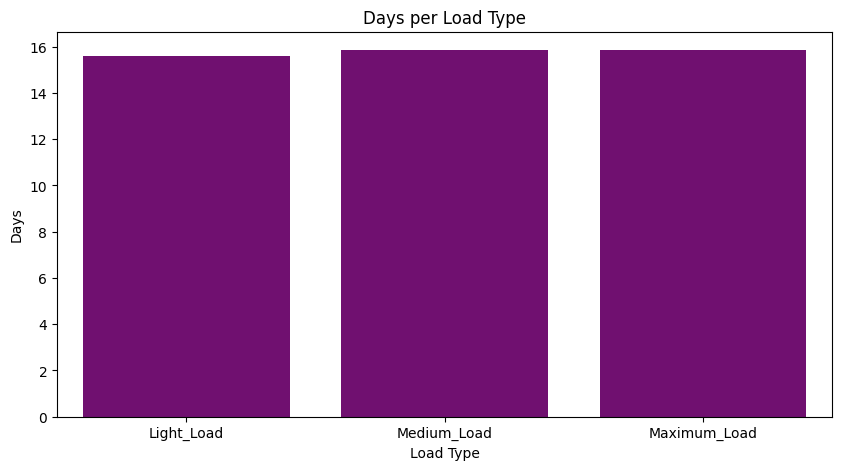

In [ ]:
# Create a barplot to view how many days fall under each load type. The size of the plot should 10 x 5
plt.figure(figsize=(10,5))
sns.barplot(x='load_type', y='day_of_week', data=df, errorbar=None, color='purple')
# creating axis labels and title
plt.xlabel('Load Type')
plt.ylabel('Days')
plt.title('Days per Load Type')

plt.show()

#### Create a pairplot of all of the numerical variables using Seaborn

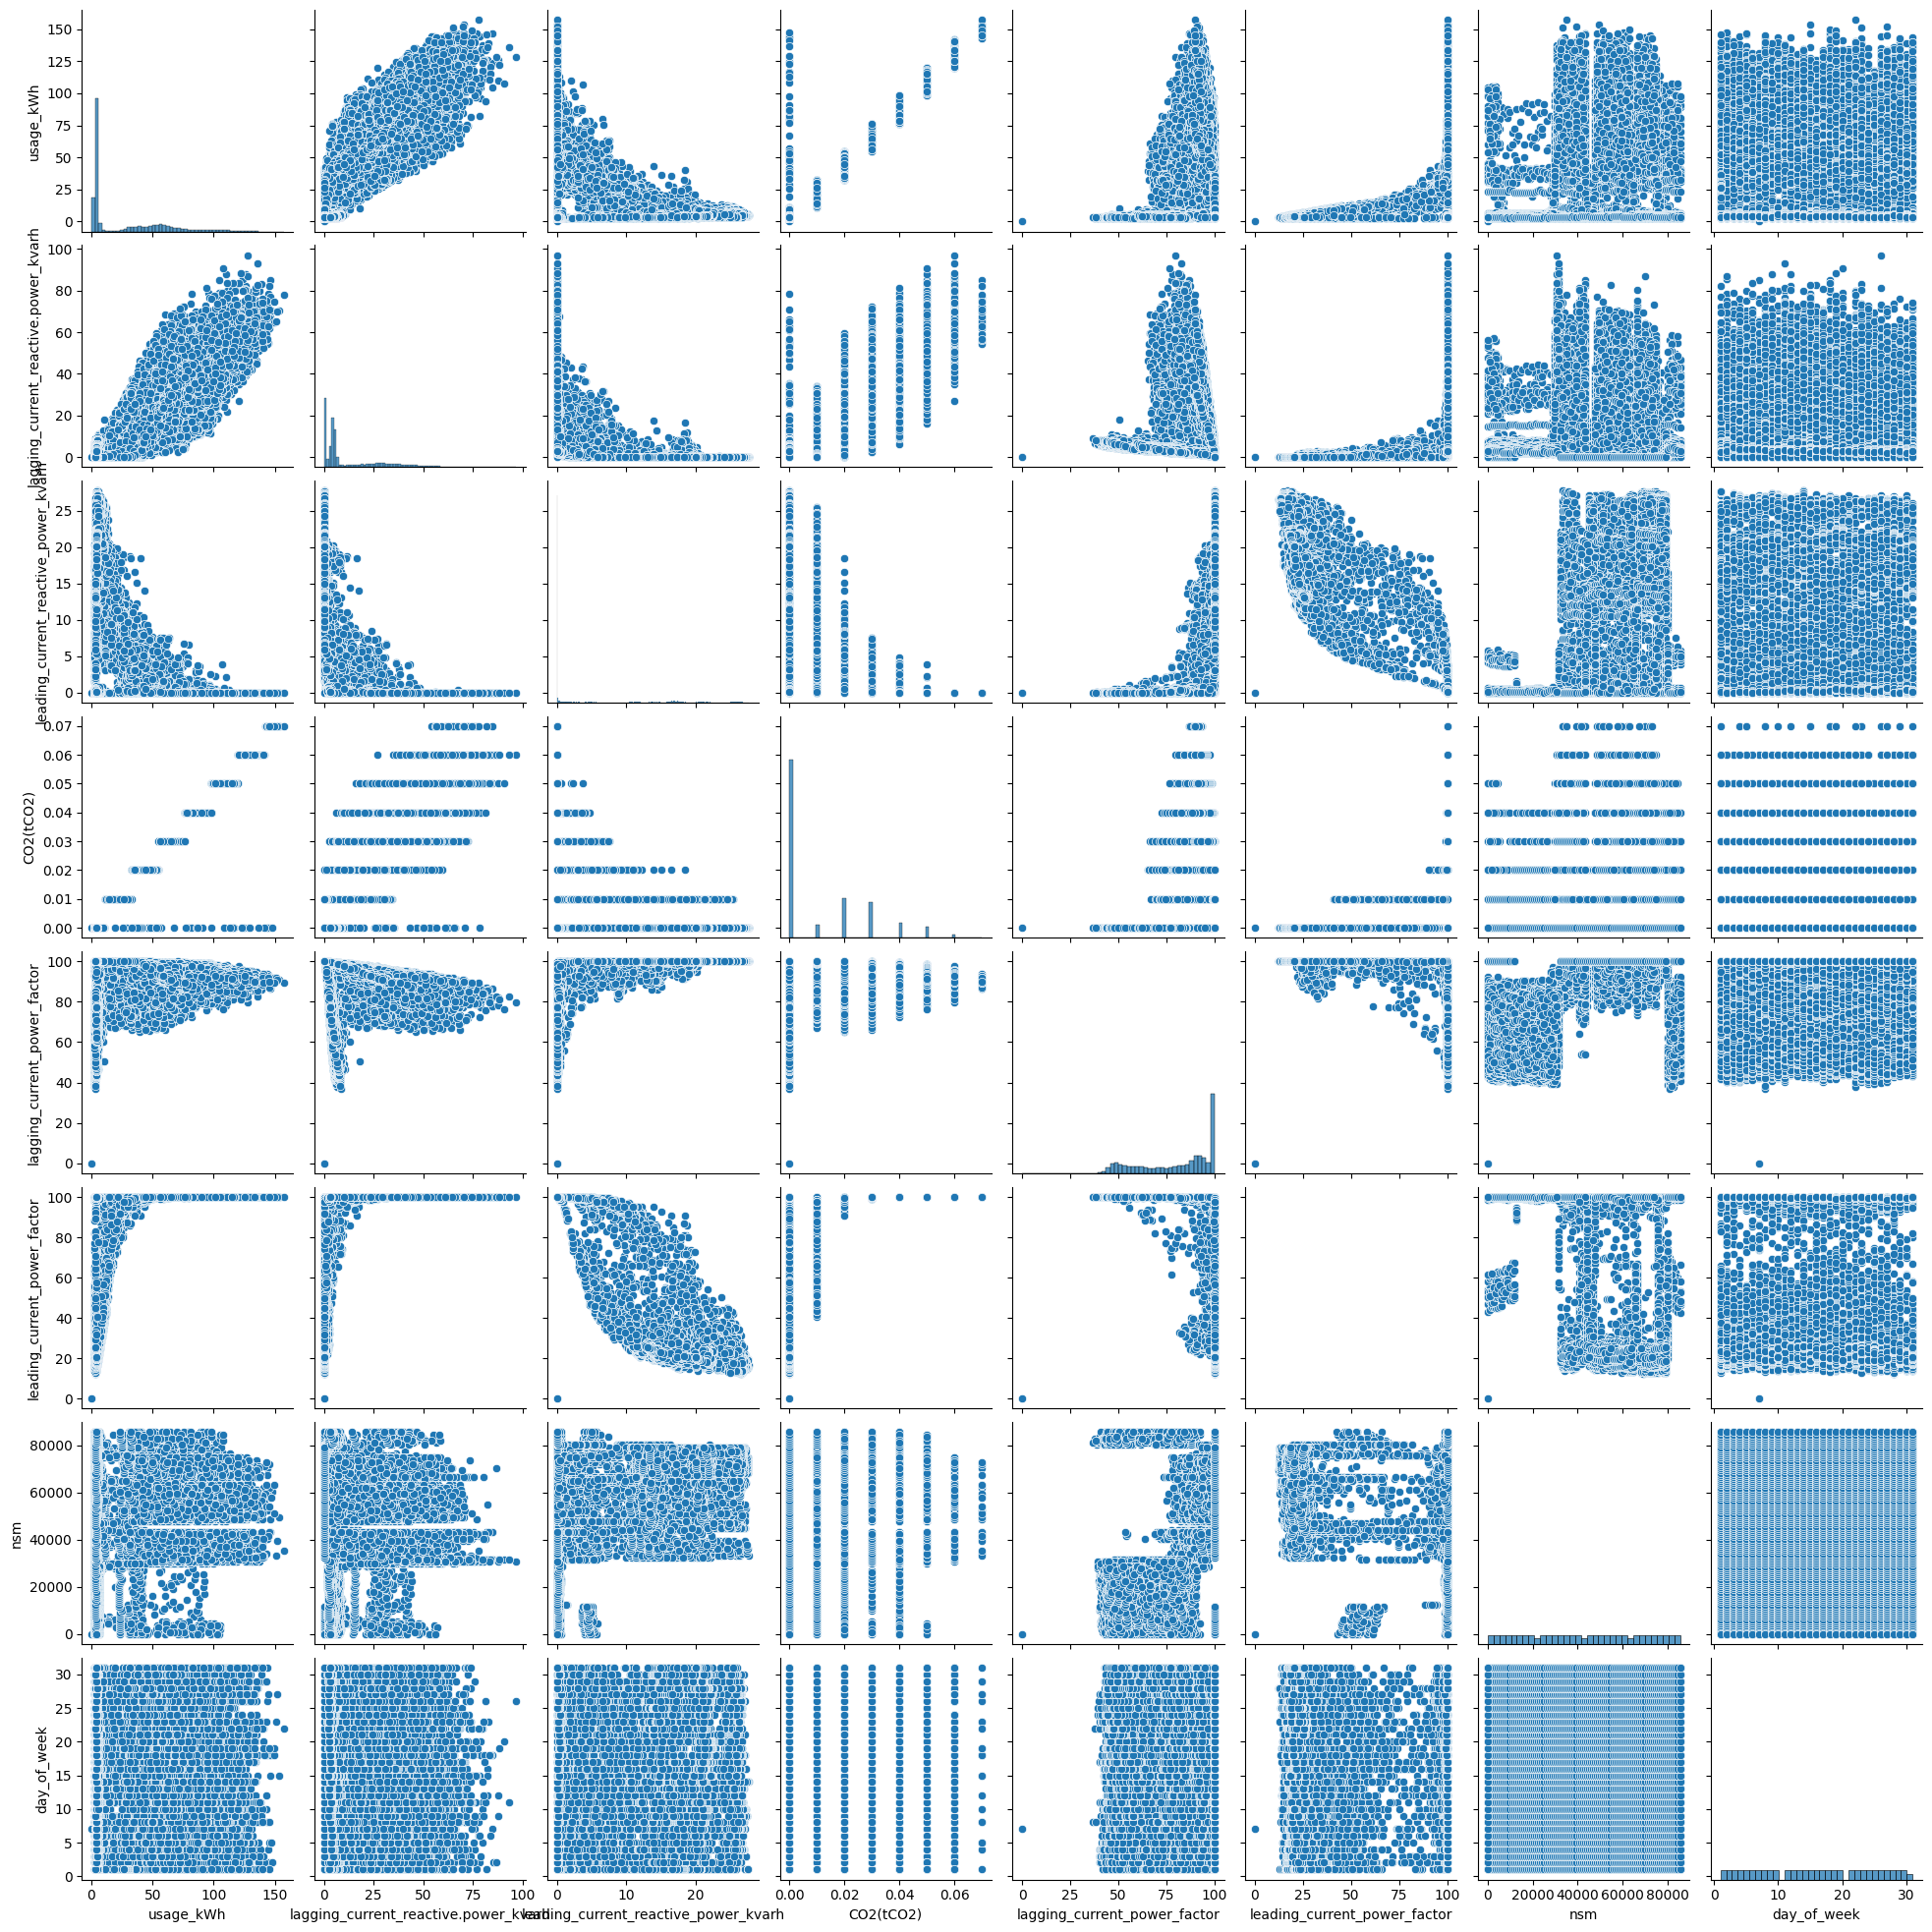

In [ ]:
# creating pair plot for all numerical variables
sns.pairplot(df)

#### In a Markdown comment - write up any interesting patterns you see from the pairplot.
Based on the pairplot:
* Usage_kWh and lagging_current_reactive_power_kVarh seem to have a somewhat strong positive correlation with one another'
* leading_current_reactive_power_kVarh and leading_current_power_factor seems to have a somewhat strong negative correlation with one amother. There seems to be at least one outlier near the origin of its graph.

## 4) Splitting Data into Train/Test

#### Create a data frame called X of your inputs that includes all columns except date and usage_kwh.

In [ ]:
# Create a data frame X of inputs that includes all columns except date and usage_kwh.
X = df.drop(['date', 'usage_kWh'], axis=1)

#### Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.

In [ ]:
# Create a data frame y of output that includes only usage_kwh. This is the target variable.
y = df['usage_kWh']

#### Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [ ]:
# Splitting the data into Train/Test sets.  Use 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5) Building the Pipeline
#### Create a column transformer that will OneHotEncode the categorical variables MinMax scale the numerical variables (not the output)

In [ ]:
# Creating a column transformer using OneHotEncode for the categorical variables and MinMax scale for the numerical variables
numerical_features = ['lagging_current_reactive.power_kvarh', 'leading_current_reactive_power_kvarh', 'lagging_current_power_factor', 'leading_current_power_factor', 'nsm']
categorical_features = ['week_status', 'load_week', 'load_type']

# incorporating the preprocessing steps into a column tranformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

#### Create a pipeline that will transform the data and then run a LinearRegression.

In [ ]:
# creating pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

## 6) Executing the Model
#### Run the pipeline to fit the Linear Regression Model.

In [ ]:
# running a linear regression
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['lagging_current_reactive.power_kvarh',
                                                   'leading_current_reactive_power_kvarh',
                                                   'lagging_current_power_factor',
                                                   'leading_current_power_factor',
                                                   'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['week_status', 'load_week',
                                                   'load_type'])])),
                ('regressor', LinearRegression())])

## 7) Evaluating the Model

#### Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [ ]:
# Running the pipeline to predict y values from the test data set and saving them to variable y_pred.
y_pred = pipeline.predict(X_test)

#### Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.

In [ ]:
# calcutling the root mean squared error for the train
y_train_pred = pipeline.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print("MSE (train):", mse_train)
print("RMSE (train):", rmse_train)

# calculating the root mean squared error for the test
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
print("MSE (test):", mse_test)
print("RMSE (train):", rmse_test)

MSE (train): 91.84575278598423
RMSE (train): 9.58361898167828
MSE (test): 95.87086848814533
RMSE (train): 9.791367038781935


For Train:
* We have a mean squared error of 91.85. This means our model's prediction deviates by 91.85 kWh from the true power usage.
* .Our root mean squared error is 9.58.... INTERPRET

For Test:
* We have a mean squared error of 95.87. This means our model's prediction
deviates by 95.87 kWh from the true power usage.
* Our root mean squared error is 9.79..... INTERPRET

In [ ]:
# Calculate the R-squared value of the model (test only).  In a Markdown comment below the result, interpret the output you receive.
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9156602581826747


We have an R squared value of 0.916 which implies that approximately 91.6% of the variation in power usage in kWh can be explained by lagging_current_reactive.power_kvarh, leading_current_reactive_power_kvarh, lagging_current_power_factor, 'leading_current_power_factor, nsm, week_status, load_week,  and load_type. This means our model performed very well.

#### Write the code to display the intercept value (bias) and coefficients of the model. (These will be two different lines of code).


In [ ]:
# computing intercept
print("Intercept:", pipeline.named_steps['regressor'].intercept_)

Intercept: -64.14118078248535


In [ ]:
# computing coefficient
print("Coefficients:", pipeline.named_steps['regressor'].coef_)

Coefficients: [ 1.40088420e+02  1.15148866e-01  6.14197824e+01  2.88230841e+01
  7.58748845e-01 -4.82096387e-01  4.82096387e-01 -3.27591103e-01
 -1.95711042e-01 -2.13876994e-01  6.95973381e-01 -3.47248639e-01
  2.03787711e-01  1.84666685e-01 -4.94483267e+00  1.93975564e+00
  3.00507702e+00]


## 8) Conclusion
#### In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage.

comment...

# Problem 2
#### Now you are going to do a Logistic Regression to predict whether the data represents a week day or a weekend day.
## 1) Logistic Regression - Acquire Data
#### You have already read the data into a dataframe named df.  However, you need to recode the 'week_status' column so a Weekday is coded as 1 and a Weekend is coded as a 0.

In [ ]:
df.sample(7)

,date,usage_kWh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,CO2(tCO2),lagging_current_power_factor,leading_current_power_factor,nsm,week_status,load_week,load_type,day_of_week
27700,2018-10-16 13:15:00,34.74,18.50,4.64,0.02,88.26,99.12,47700,Weekday,Tuesday,Maximum_Load,16
33352,2018-12-14 10:15:00,109.69,44.57,0.00,0.05,92.64,100.00,36900,Weekday,Friday,Maximum_Load,14
26238,2018-10-01 07:45:00,2.92,4.32,0.00,0.00,56.00,100.00,27900,Weekday,Monday,Light_Load,1
365,2018-01-04 19:30:00,52.74,16.31,0.00,0.02,95.54,100.00,70200,Weekday,Thursday,Maximum_Load,4
24227,2018-09-10 09:00:00,50.11,22.86,0.00,0.02,90.98,100.00,32400,Weekday,Monday,Light_Load,10
23583,2018-09-03 16:00:00,83.16,48.28,0.00,0.04,86.48,100.00,57600,Weekday,Monday,Maximum_Load,3
11267,2018-04-28 09:00:00,60.48,6.98,1.01,0.03,99.34,99.99,32400,Weekend,Saturday,Light_Load,28


In [ ]:
# recoding the week_status column where if x < 0 this indicates (Monday through Friday) where anything beyon 5 indicated (saturday through sunday)
df['week_status'] = df['date'].dt.weekday.apply(lambda x: 1 if x < 5 else 0)

# checking if week_status was recoded
df.sample(7)

,date,usage_kWh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,CO2(tCO2),lagging_current_power_factor,leading_current_power_factor,nsm,week_status,load_week,load_type,day_of_week
10551,2018-04-20 22:00:00,5.04,0.00,26.68,0.00,100.00,18.56,79200,1,Friday,Medium_Load,20
9727,2018-04-12 08:00:00,4.93,5.54,0.00,0.00,66.48,100.00,28800,1,Thursday,Light_Load,12
1727,2018-01-18 00:00:00,72.25,39.02,0.00,0.03,87.99,100.00,0,1,Thursday,Light_Load,18
13447,2018-05-21 02:00:00,3.06,4.79,0.00,0.00,53.84,100.00,7200,1,Monday,Light_Load,21
31165,2018-11-21 15:30:00,122.98,43.31,0.00,0.06,94.32,100.00,55800,1,Wednesday,Medium_Load,21
33603,2018-12-17 01:00:00,4.21,3.49,0.07,0.00,76.99,99.99,3600,1,Monday,Light_Load,17
6983,2018-03-14 18:00:00,40.75,5.47,4.25,0.02,99.11,99.46,64800,1,Wednesday,Medium_Load,14


## 2) Splitting Data in to Train/Test

#### Create a data frame called X of your inputs that includes all columns except date, week_status, and day_of_week.

In [ ]:
# creating variable X
X = df.drop(['date', 'week_status', 'day_of_week'], axis=1)

#### Create a data frame called y that contains week_status. This will be your target variable.

In [ ]:
# cretaing variable y
y = df['week_status']

#### Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [ ]:
# Splitting the data into Train/Test sets.  Use 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3) Building the Pipeline
#### Create a column transformer that will OneHotEncode the categorical variables (not the output/target variable) and MinMax scale the numerical variables (not the output)

In [ ]:
# Creating a column transformer using OneHotEncode for the categorical variables and MinMax scale for the numerical variables
numerical_features = ['usage_kWh', 'lagging_current_reactive.power_kvarh', 'leading_current_reactive_power_kvarh', 'lagging_current_power_factor', 'leading_current_power_factor', 'nsm']
categorical_features = ['load_week', 'load_type']

# incorporating the preprocessing steps into a column tranformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

#### Create a pipeline that will transform the data and then run a LogisticRegression.

In [ ]:
# creating pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression())
])

## 4) Executing the Model
#### Run the pipeline to fit the Logistic Regression Model.

In [ ]:
# running a logistic regression
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['usage_kWh',
                                                   'lagging_current_reactive.power_kvarh',
                                                   'leading_current_reactive_power_kvarh',
                                                   'lagging_current_power_factor',
                                                   'leading_current_power_factor',
                                                   'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['load_week',
                                                   'load_type'])])),
                ('regressor', LogisticRegression())])

## 5) Evaluating the Model
#### Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [ ]:
# Running the pipeline to predict y values from the test data set and saving them to variable y_pred.
y_pred = pipeline.predict(X_test)

#### Call the plot_cm function to generate the confusion matrix.

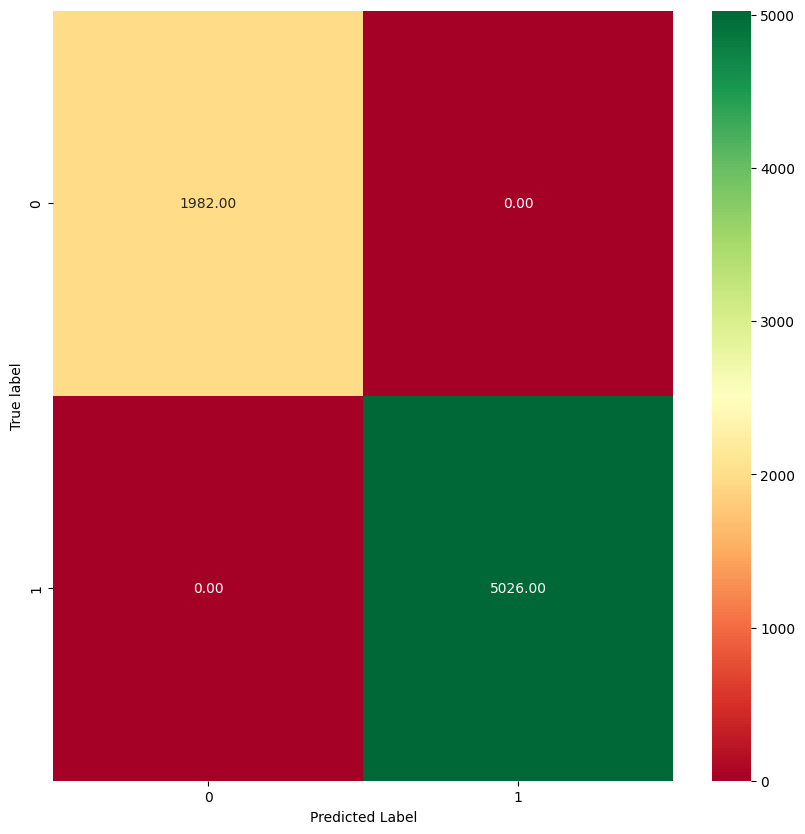

In [ ]:
# generating the confusion matrix using plot_cm
plot_cm(y_test, y_pred)

#### Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.

In [ ]:
# printing the classifcation report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1982
           1       1.00      1.00      1.00      5026

    accuracy                           1.00      7008
   macro avg       1.00      1.00      1.00      7008
weighted avg       1.00      1.00      1.00      7008



COMMENT ABOUT CONFUION MATRIX AND CLASSIFICTION REPORT

#### Generate an ROC Curve or a Precision-Recall Curve as appropriate with (AUC). In a comment below your results, interpret your results and explain why your choice of curve.

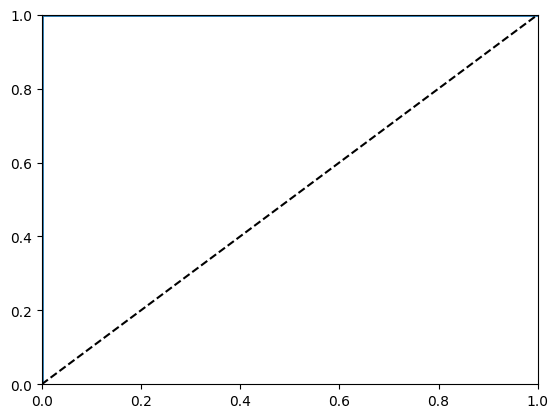

In [ ]:
# plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [ ]:
# computer the AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

AUC: 1.0


COMMENT on the ROC curve and the AUC

## 6) Conclusion
#### In a Markdown comment, write a conclusion on how suitable you think this model is for predicting week_status.